# A. Assignment details

- What: Download, manipulate and merge two or more datasets from below
- How: Create functions in a python file to do this
- Show: Show how to use these python files in a notebook

More details here: reports/assignments/milestone_1/extracredit_explainer.md


## 1.1 Download data

In [ ]:
import sys
!{sys.executable} -m pip install pandas

import pandas as pd

#  Reading CSV file
dfGDP = pd.read_csv('/Users/wanonnoiqtyider/Documents/GitHub/graspp_2025_spring/data/raw/2025-04-27T13-04_export.csv')
dfDEMO = pd.read_csv('/Users/wanonnoiqtyider/Documents/GitHub/graspp_2025_spring/data/raw/demoert.csv')

# Show the first few rows to confirm it loaded correctly
print(dfGDP.head(2))
print(dfDEMO.head(2))



Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
  ISO code Country Variable code  \
0      ABW   Aruba        rgdpna   
1      AGO  Angola        rgdpna   

                                       Variable name  1950  1951  1952  1953  \
0  Real GDP at constant 2017 national prices (in ...   NaN   NaN   NaN   NaN   
1  Real GDP at constant 2017 national prices (in ...   NaN   NaN   NaN   NaN   

   1954  1955  ...           2010           2011           2012  \
0   NaN   NaN  ...    2691.888916    2701.084229    2664.083496   
1   NaN   NaN  ...  189691.968750  196278.031250  213044.406250   

            2013           2014           2015           2016           2017  \
0    2775.927490    2783.492920    2942.782227    3003.413574    3062.580566   
1  223599.890625  234383.265625  236594.859375  230491.171875  230151.343750   

            2018           2

In [26]:
print(dfGDP.columns)
print(dfDEMO.columns)

dfGDP.Country.unique
dfDEMO.country_name.unique

Index(['ISO code', 'Country', 'Variable code', 'Variable name', '1950', '1951',
       '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019'],
      dtype='object')
Index(['Unnamed: 0', 'country_id', 'country_text_id', 'country_name', 'year',
       'v2x_regime', 'v2x_polyarchy', 'v2x_polyarchy_codelow',
       'v2x_polyarchy_codehigh', 'reg_start_year', 'reg_end_year', 'reg_id',
       'reg_type', 'reg_trans', 'dem_founding_elec', 'aut_founding_elec',
     

<bound method Series.unique of 0          Mexico
1          Mexico
2          Mexico
3          Mexico
4          Mexico
           ...   
19673    Zanzibar
19674    Zanzibar
19675    Zanzibar
19676    Zanzibar
19677    Zanzibar
Name: country_name, Length: 19678, dtype: object>

## 1.2 Manipulate Data

In [32]:
columns_to_keep_gdp = ['ISO code', 'Country'] + [str(year) for year in range(1950, 2020)]
dfGDP = dfGDP[columns_to_keep_gdp]
dfGDP

columns_to_keep_demo = ['country_name', 'year', 'v2x_regime', 'v2x_polyarchy']
dfDEMO = dfDEMO[columns_to_keep_demo]
dfDEMO

# Melt dfGDP to long format
dfGDP_long = dfGDP.melt(id_vars=['ISO code', 'Country'], var_name='year', value_name='gdp_value')

# Check what it looks like
print(dfGDP_long.head())



  ISO code               Country  year  gdp_value
0      ABW                 Aruba  1950        NaN
1      AGO                Angola  1950        NaN
2      AIA              Anguilla  1950        NaN
3      ALB               Albania  1950        NaN
4      ARE  United Arab Emirates  1950        NaN


## 1.3 Merge Data

In [ ]:
# Convert 'year' in dfGDP_long to integer (because dfDEMO's year is probably int type)
dfGDP_long['year'] = dfGDP_long['year'].astype(int)

# Merge
df_merged = pd.merge(dfDEMO, dfGDP_long, how='left', 
                     left_on=['country_name', 'year'], right_on=['Country', 'year'])

# Check result
print(df_merged.head())

# Drop duplicate columns after merge
df_merged = df_merged.drop(columns=['Country'])

# Rename columns to more intuitive names
df_merged = df_merged.rename(columns={
    'country_name': 'Country',
    'year': 'Year',
    'v2x_regime': 'Regime Type Score',
    'v2x_polyarchy': 'Polyarchy Score',
    'gdp_value': 'GDP Value'})

print(df_merged.head())




  country_name  year  v2x_regime  v2x_polyarchy ISO code Country  gdp_value
0       Mexico  1900         0.0          0.124      NaN     NaN        NaN
1       Mexico  1901         0.0          0.108      NaN     NaN        NaN
2       Mexico  1902         0.0          0.108      NaN     NaN        NaN
3       Mexico  1903         0.0          0.108      NaN     NaN        NaN
4       Mexico  1904         0.0          0.108      NaN     NaN        NaN
  Country  Year  Regime Type Score  Polyarchy Score ISO code  GDP Value
0  Mexico  1900                0.0            0.124      NaN        NaN
1  Mexico  1901                0.0            0.108      NaN        NaN
2  Mexico  1902                0.0            0.108      NaN        NaN
3  Mexico  1903                0.0            0.108      NaN        NaN
4  Mexico  1904                0.0            0.108      NaN        NaN


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


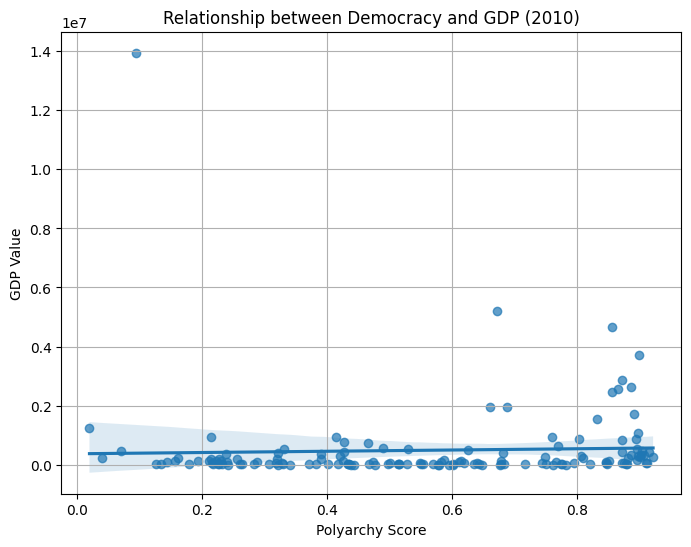

In [46]:
#Visualizing the Data
import sys
!{sys.executable} -m pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt  # <-- Don't forget this line!

# Filter for 2010
df_2010 = df_merged[df_merged['Year'] == 2010]

# Regression plot
plt.figure(figsize=(8,6))
sns.regplot(x='Polyarchy Score', y='GDP Value', data=df_2010, scatter_kws={'alpha':0.7})
plt.title('Relationship between Democracy and GDP (2010)')
plt.xlabel('Polyarchy Score')
plt.ylabel('GDP Value')
plt.grid(True)
plt.show()



## Global datasets

- What: Download, manipulate and merge two or more datasets from below
- How: Create functions in a python file to do this
- Show: Show how to use these python files in a notebook

* **Penn World Table (PWT):** Provides purchasing power parity and national income accounts data.
    * **Link:** [http://www.ggdc.net/pwt](http://www.ggdc.net/pwt)

* **UNCTADstat (UNCTAD):** Offers data on trade, investment, and development.
    * **Link:** [https://unctadstat.unctad.org/](https://unctadstat.unctad.org/)

* **FAOSTAT (FAO):** Provides data on food, agriculture, forestry, and related areas.
    * **Link:** [http://www.fao.org/faostat/en/#data](http://www.fao.org/faostat/en/#data)

* **ILOSTAT (ILO):** Offers labor statistics, including employment and wages.
    * **Link:** [https://ilostat.ilo.org/](https://ilostat.ilo.org/)

* **Federal Reserve Economic Data (FRED):** Economic and financial data from the Federal Reserve.
    * **Link:** [https://fred.stlouisfed.org/](https://fred.stlouisfed.org/)

* **Bank for International Settlements (BIS):** Data and statistics on banking, financial markets, and the global economy.
    * **Link:** [https://www.bis.org/statistics/index.htm](https://www.bis.org/statistics/index.htm)

* **International Monetary Fund (IMF) Data:** A variety of macroeconomic and financial data.
    * **Link:** [https://www.imf.org/en/data](https://www.imf.org/en/data)

* **Eurostat:** Provides a wide range of statistics on the European Union, including economic, social, and demographic data.
    * **Link:** [https://ec.europa.eu/eurostat/](https://ec.europa.eu/eurostat/)

* **World Bank Data:** Comprehensive data on development indicators across countries.
    * **Link:** [https://data.worldbank.org/](https://data.worldbank.org/)

* **Varieties of Democracy (V-Dem):** Datasets measuring various aspects of democracy across countries.
    * **Link:** [https://v-dem.net/](https://v-dem.net/)

* **OECD Data:** Statistics and indicators from the Organisation for Economic Co-operation and Development, covering a broad range of topics.
    * **Link:** [https://data.oecd.org/](https://data.oecd.org/)

* **Quality of Government (QoG):** Datasets on governance, institutions, and quality of government.
    * **Link:** [https://qog.gu.se/](https://qog.gu.se/)

* **IPCC Data:** Climate change data and scenarios from the Intergovernmental Panel on Climate Change.
    * (Note: Access to data varies, often through specific reports or data portals linked within the IPCC website)
    * **Link:** [https://www.ipcc.ch/](https://www.ipcc.ch/)

* **Our World in Data:** Research and data on global development, poverty, health, and other topics.
    * **Link:** [https://ourworldindata.org/](https://ourworldindata.org/)

* **UN Comtrade:** United Nations Commodity Trade Statistics Database.
    * **Link:** [https://comtrade.un.org/](https://comtrade.un.org/)


## Academic datasets

* **Dallas Fed Global Economic Indicators (DGEI):** [DGEI](https://www.dallasfed.org/research/international/dgei)
* **Dallas Fed International House Price Database:** [House Price](https://www.dallasfed.org/research/international/houseprice#data)
* **New York Fed r* (Natural Rate of Interest):** [r*](https://www.newyorkfed.org/research/policy/rstar)
* **Chinn-Ito Index (KAOPEN):** [KAOPEN](https://web.pdx.edu/~ito/Chinn-Ito_website.htm)
* **Metrick-Schmelzing Paper and Database (Long-Term Real Rates):** [Real Rates](https://som.yale.edu/centers/program-on-financial-stability/metrick-schmelzing-paper-and-database)
* **Yale Program on Financial Stability COVID-19 Tracker:** [COVID-19 Tracker](https://som.yale.edu/centers/program-on-financial-stability/covid-19-tracker)
* **IMF Financial Integration:** [Financial Integration](https://www.imf.org/en/Publications/WP/Issues/2017/05/10/International-Financial-Integration-in-the-Aftermath-of-the-Global-Financial-Crisis-44906)
* **IMF Macroprudential Policy Survey:** [Macroprudential](https://www.elibrary-areaer.imf.org/Macroprudential/Pages/Home.aspx)
* **Nancy Xu's Risk Aversion Index:** [Risk Aversion](https://www.nancyxu.net/risk-aversion-index)
* **Jorda-Schularick-Taylor Macrohistory Database:** [Macrohistory](https://www.nber.org/research/data/jorda-schularick-taylor-macrohistory)
* **Central Bank Independence (CBI) Data:** [CBI Data](https://sites.google.com/site/carogarriga/cbi-data-1)
* **Global Inflation Data:** [Inflation Data](https://www.worldbank.org/en/research/brief/inflation-database)

## U.S Datasets
- https://www.sca.isr.umich.edu/tables.html
- https://www.bea.gov/data
- https://www.bls.gov/jlt/
- https://adpemploymentreport.com/

## Japan datasets

* **Economy Watchers Survey (Cabinet Office):** [Watchers Survey](https://www5.cao.go.jp/keizai3/watcher.html)
* **Consumption Trend Index (ESRI, Cabinet Office):** [Consumption Index](https://www.esri.cao.go.jp/en/stat/shouhi/shouhi-e.html)
* **Prefectural Accounts (ESRI, Cabinet Office):** [Prefectural Accounts](https://www.esri.cao.go.jp/jp/sna/sonota/kenmin/kenmin_top.html)
* **Insurance Statistics (General Insurance Association of Japan):** [Insurance Stats](https://www.sonpo.or.jp/en/statistics/index.html)
* **FSA Policy Response (Financial Services Agency):** [FSA Response](https://www.fsa.go.jp/news/r1/20200313-2.html)
* **Franchise Industry Data (Japan Franchise Association):** [Franchise Data](https://www.jfnet.or.jp/data/data_c.html)
* **Trends Foreign Visitors (MLIT, Japan Tourism Agency):** [Visitor Spending](https://www.mlit.go.jp/kankocho/tokei_hakusyo/gaikokujinshohidoko.html)
* **Tax and Stamp Revenues (Ministry of Finance):** [Tax Revenues](https://www.mof.go.jp/tax_policy/reference/taxes_and_stamp_revenues/data.htm)
* **Life Insurance Statistics (Life Insurance Association of Japan):** [Life Insurance](https://www.seiho.or.jp/english/statistics/)
* **Economic Growth (Tokyo Foundation for Policy Research):** [GDP](https://www.tkfd.or.jp/research/detail.php?id=2983)
* **Consumer Price Index (Statistics Bureau of Japan):** [CPI](https://www.stat.go.jp/english/data/cpi/1588.html#his)
* **Bank Financial Statements (Financial Services Agency):** [Bank Statements](https://www.fsa.go.jp/status/ginkou_kessan/index.html)
* **Budget Revenue and Expenditure (Ministry of Finance):** [Budget Data](https://www.mof.go.jp/policy/budget/report/revenue_and_expenditure/index.htm)
* **Trade Statistics (Japan Customs):** [Trade Stats](https://www.customs.go.jp/toukei/info/index_e.htm)
* **Banking Statistics (Japanese Bankers Association):** [Banking Stats](https://www.zenginkyo.or.jp/stats/year2-02/)
* **Household Expenditure Survey (Statistics Bureau):** [Household Spending](https://www.stat.go.jp/data/kakei/longtime/index.html#time)
* **Economic Statistics (Federation of Economic Organizations):** [Econ Stats](https://www.zenkeijikyo.or.jp/statistics)
* **Regional Banks:** [Regional Banks data](https://www.chiginkyo.or.jp/news_topics/)
* **Japan Economic Policy Uncertainty Index:** [Policy Uncertainty](https://www.policyuncertainty.com/japan_monthly.html)